<a href="https://colab.research.google.com/github/jaaaamj0711/DACON/blob/main/dacon_ing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💳 신용카드 예측 EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from collections import Counter
plt.style.use('fivethirtyeight')

In [ ]:
# 한글 폰트 사용을 위한 설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumGothic')

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/open/train.csv")

In [ ]:
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


#### 결측치 확인

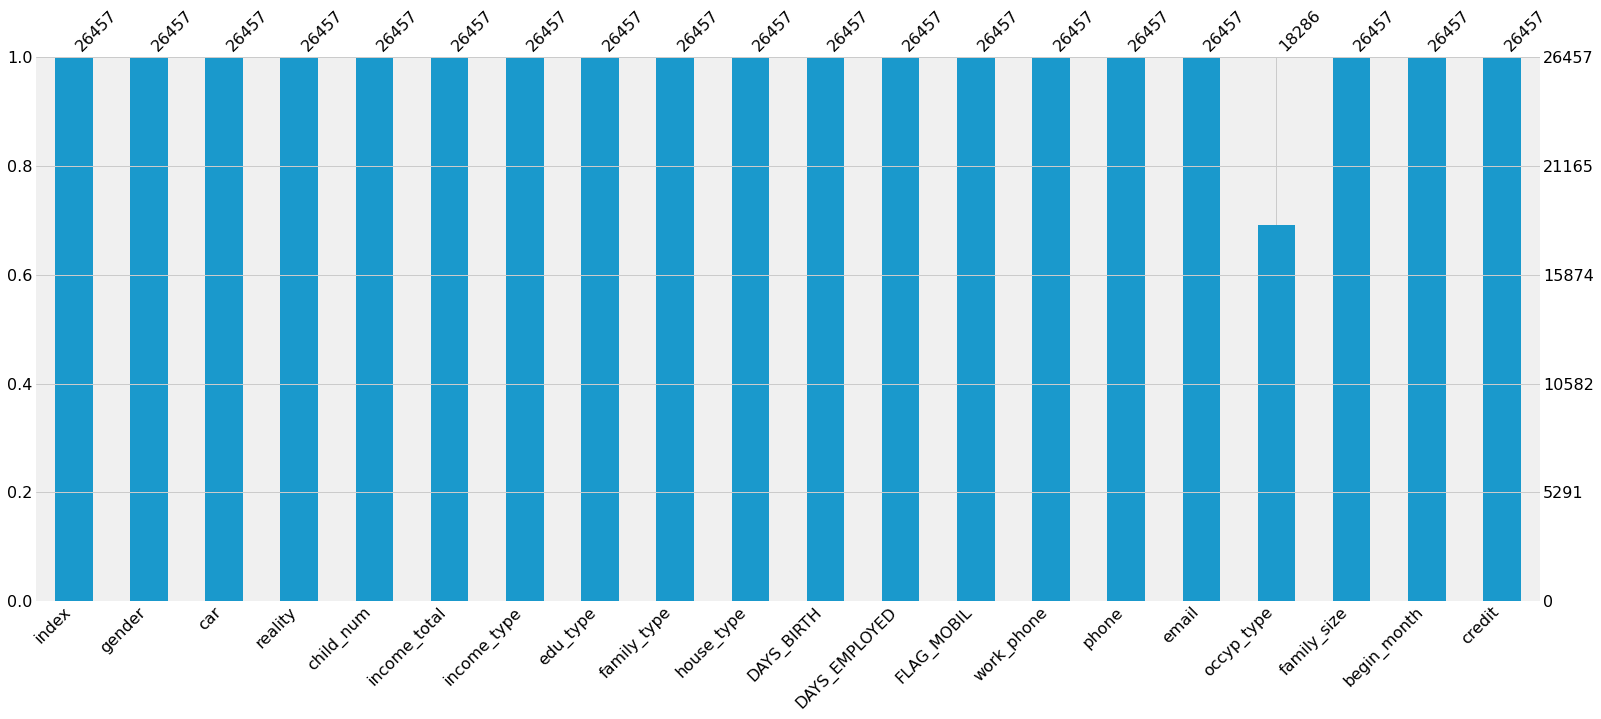

In [ ]:
import missingno as msno
msno.bar(df=train.iloc[:, :], color=(0.1, 0.6, 0.8))

In [ ]:
train['credit'].value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
# credit 형 변환
train = train.astype({'credit': 'str'})
print(train.dtypes)

index              int64
gender            object
car               object
reality           object
child_num          int64
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
FLAG_MOBIL         int64
work_phone         int64
phone              int64
email              int64
occyp_type        object
family_size      float64
begin_month      float64
credit            object
dtype: object


## 신용 등급 비율은 어떻게 될까?

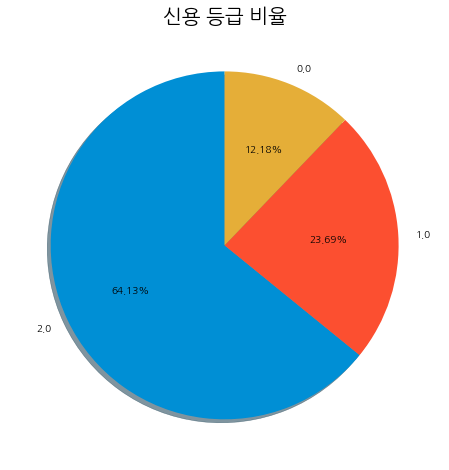

In [ ]:
plt.subplots(figsize = (8,8))
plt.pie(train['credit'].value_counts(), labels = train['credit'].value_counts().index, 
        autopct="%.2f%%", shadow = True, startangle = 90)
plt.title('신용 등급 비율', size=20)
plt.show()

- 낮을수록 높은 신용의 신용카드 사용자를 의미한다. 따라서 낮은 신용의 신용카드 사용자가 많다는 것을 알 수 있다.

In [ ]:
train['credit'].value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

In [ ]:
# 등급에 따른 차이를 보기 위한 데이터 분류
train_0 = train[train['credit']=="0.0"]
train_1 = train[train['credit']=="1.0"]
train_2 = train[train['credit']=="2.0"]

신용 등급에 따른 차이를 알아보기 위해 다음과 같이 데이터를 분리하도록 하겠습니다.

In [ ]:
# 그래프 함수 정의
def plot(column):

  f, ax = plt.subplots(1, 3, figsize=(16, 6))


  sns.countplot(x = column,
                data = train_0,
                ax = ax[0],
                order = train_0[column].value_counts()[:10].index)
  ax[0].tick_params(labelsize=12)
  ax[0].set_title('credit = 0')
  ax[0].set_ylabel('count')
  ax[0].tick_params(rotation=50)


  sns.countplot(x = column,
                data = train_1,
                ax = ax[1],
                order = train_1[column].value_counts()[:10].index)
  ax[1].tick_params(labelsize=12)
  ax[1].set_title('credit = 1')
  ax[1].set_ylabel('count')
  ax[1].tick_params(rotation=50)

  sns.countplot(x = column,
                data = train_2,
                ax = ax[2],
                order = train_2[column].value_counts()[:10].index)
  ax[2].tick_params(labelsize=12)
  ax[2].set_title('credit = 2')
  ax[2].set_ylabel('count')
  ax[2].tick_params(rotation=50)
  plt.subplots_adjust(wspace=0.3, hspace=0.3)
  plt.show()

## 🙋🏻‍♀️🙋🏻‍♂️신용 등급에 따라 성별 차이가 존재할까?

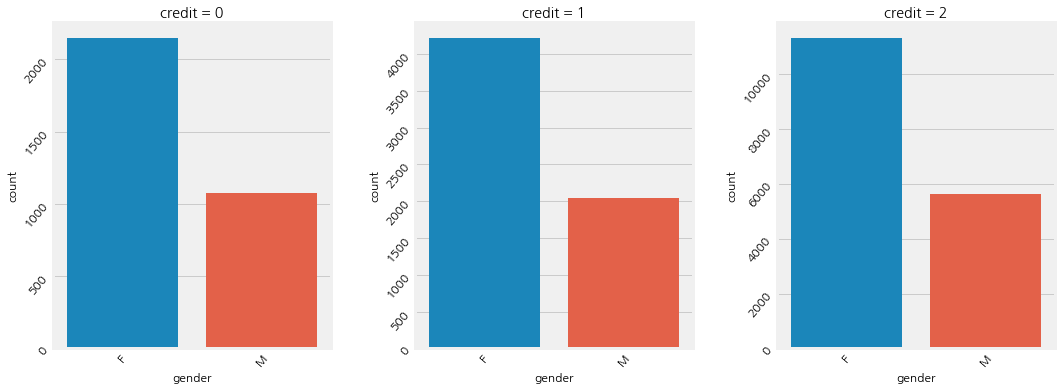

In [ ]:
plot("gender")

- 모든 등급에서 남성보다 여성이 더 많았다.

## 🚗 신용 등급에 따라 차량 소유 차이가 존재할까?

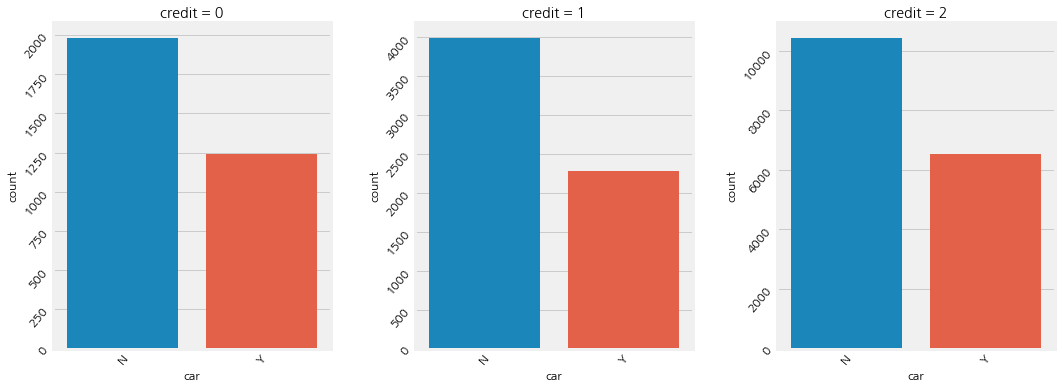

In [ ]:
plot('car')

- 모든 등급에서 차를 보유하고 있지 않은 고객들이 많았다.

## 🏠 신용 등급에 따라 부동산 소유 차이가 존재할까?

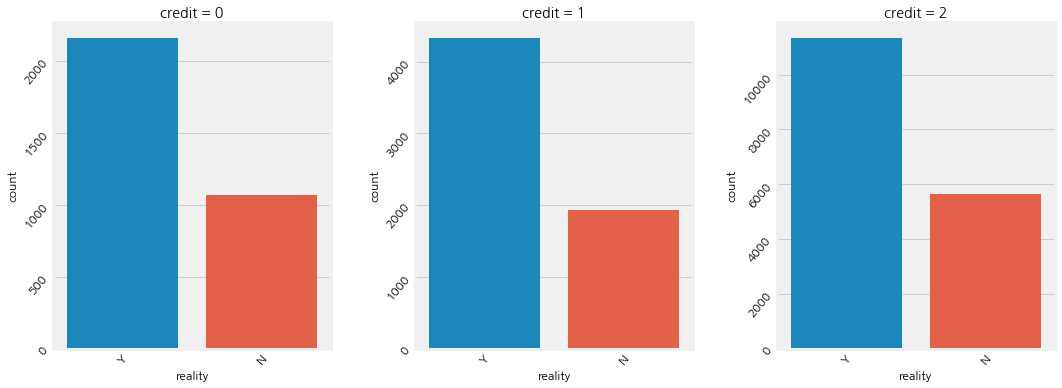

In [ ]:
plot('reality')

- 모든 등급에서 부동산을 소유한 사람들이 많았다. 딱히 등급에 따른 차이가 존재하지 않는다.

## 👶🏻 신용 등급에 따라 자녀수의 차이가 존재할까?

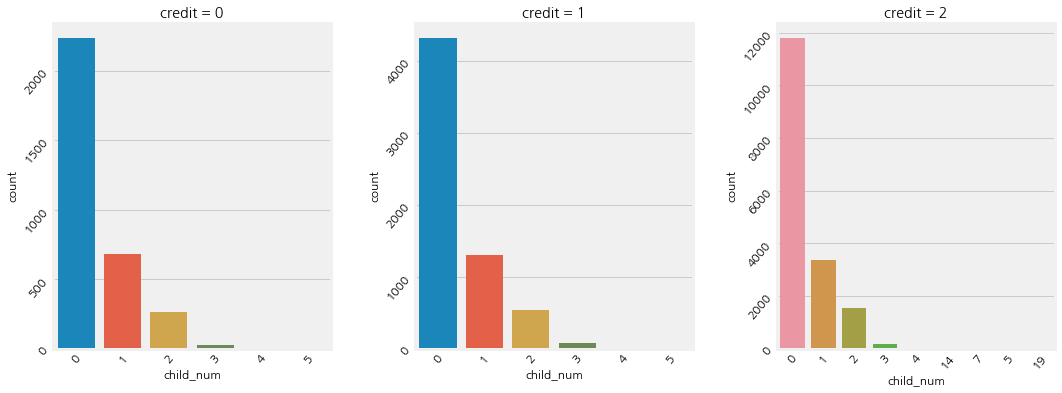

In [ ]:
plot('child_num')

- 모든 등급에서 자녀가 없는 사람들이 가장 많았고, 1명, 2명 3명 순으로 많았다. 딱히 차이가 존재하지 않는다.

## 💶 신용 등급에 따라 소득 분류의 차이가 존재할까?

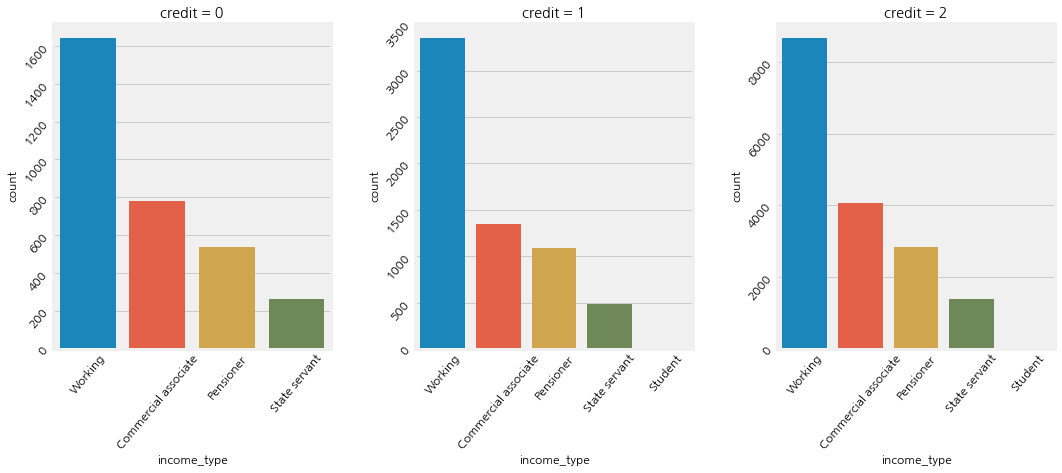

In [ ]:
plot('income_type') 

- 높은 신용에서는 학생이 존재하지 않았다. 학생의 신분 특성상 높은 신용을 가지고 있기는 어렵기 때문에 다음과 같은 결과가 나왔다고 생각한다.
- 반면 낮은 신용에서는 학생들이 조금씩 존재했다.

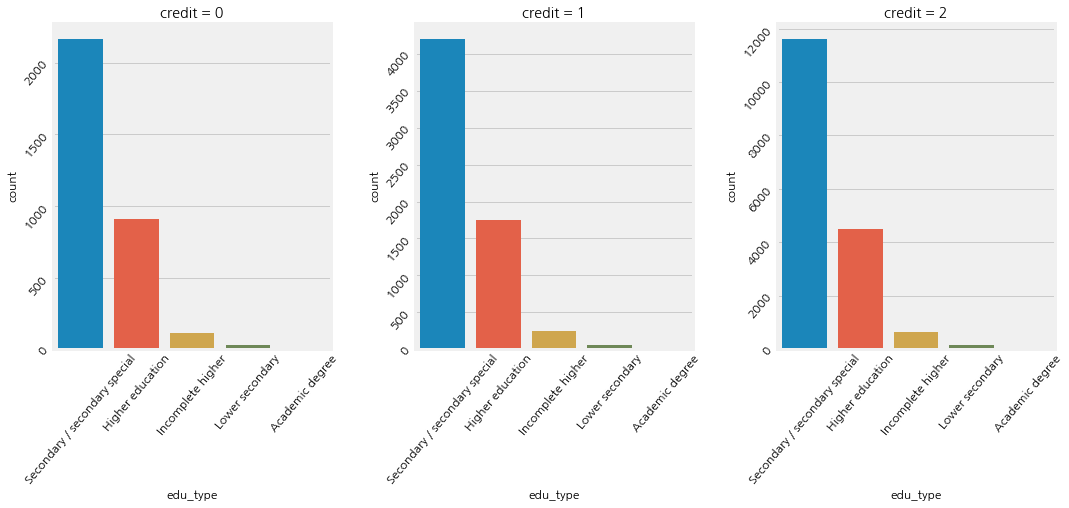

In [92]:
plot('edu_type')

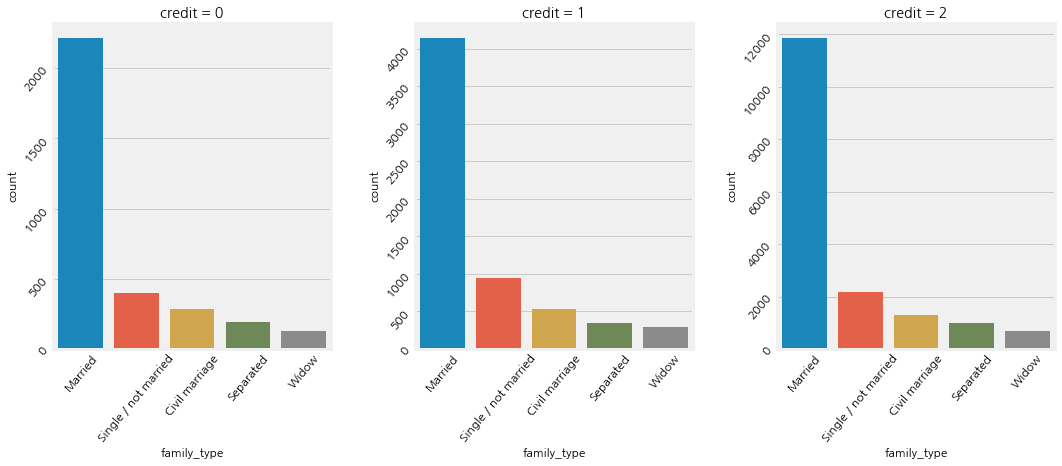

In [94]:
plot('family_type')

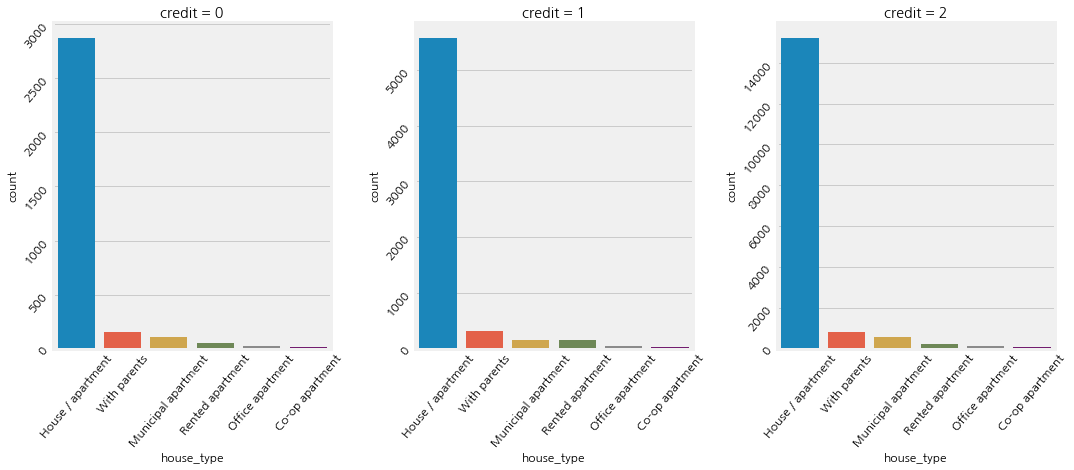

In [95]:
plot('house_type')

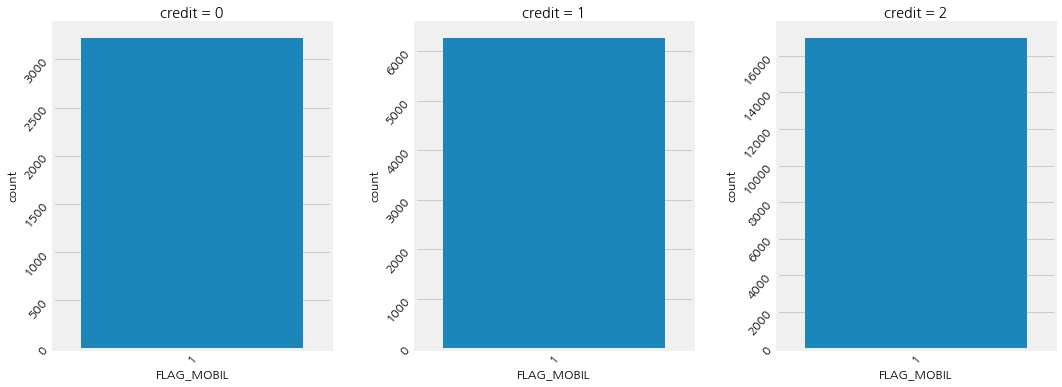

In [96]:
plot('FLAG_MOBIL')

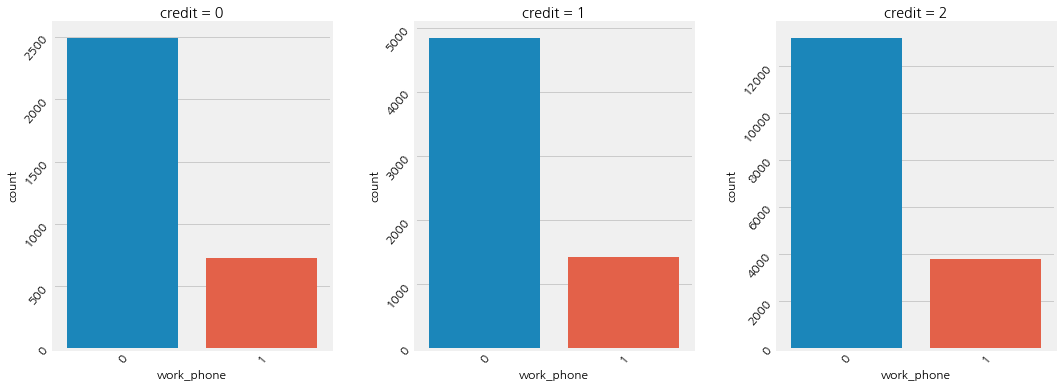

In [97]:
plot('work_phone')

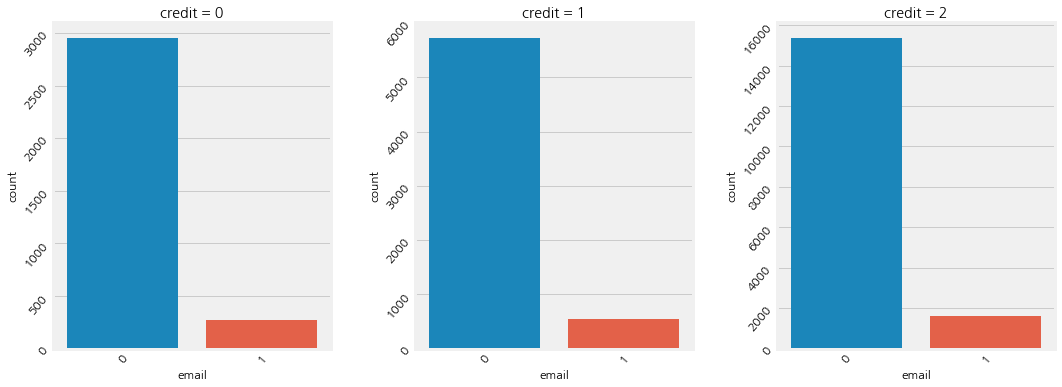

In [98]:
plot('email')

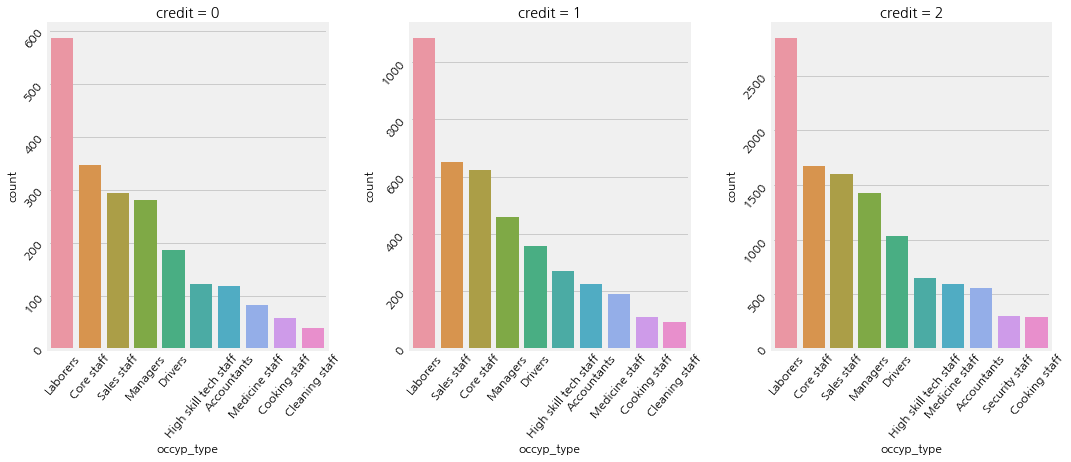

In [99]:
plot('occyp_type')

KeyError: ignored

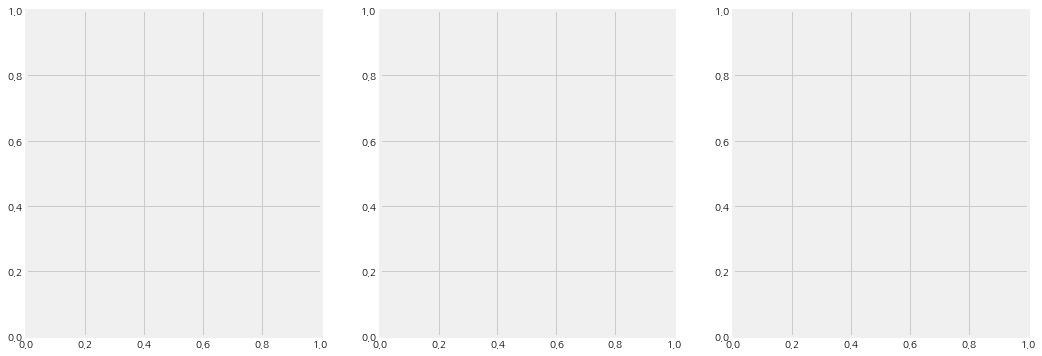

In [100]:
plot('family_size')